# Poisson Equation in 2D

In this tutorial we solve the Poisson equation in two space dimensions.

For a domain $\Omega \subset \mathbb{R}^2$ with boundary $\partial \Omega = \Gamma_D \cup \Gamma_N$, we write the boundary value problem (BVP):

$$ 
\left\{
\begin{array}{ll}
- \Delta u = f  & \text{in} \; \Omega, \\
u = u_D & \text{on} \; \Gamma_D, \\
\nabla u \cdot \boldsymbol{n} = g & \text{on} \; \Gamma_N.
\end{array}
\right.$$

Based on code from Eldar Khattov:
https://bitbucket.org/eldarkh/geo384_f2018/src/master/Material/3_Poisson2D/Poisson2D.py

### 1. Imports

In [1]:
import dolfin as dl
import math
import matplotlib.pyplot as plt

### 2. Define the mesh and the finite element space

Number of dofs 1089


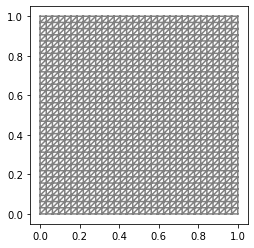

In [2]:
n = 32
finite_element_order_p = 1
mesh = dl.UnitSquareMesh(n, n)
Vh = dl.FunctionSpace(mesh, "Lagrange", finite_element_order_p)

print("Number of dofs", Vh.dim())
dl.plot(mesh)

### 3. Define the Dirichlet boundary condition

In [3]:
tol = 1e-8
def dirichlet_boundary(x, on_boundary):
    return (x[1] < tol or x[0] < tol or x[0] > 1.0 - tol) and on_boundary

u_d  = dl.Expression("sin(pi*x[0])", degree = finite_element_order_p+2)
bcs = [dl.DirichletBC(Vh, u_d, dirichlet_boundary)]

### 4. Define the variational problem

In [4]:
u_trial = dl.TrialFunction(Vh)
v_test = dl.TestFunction(Vh)
f = dl.Constant(0.)
g = dl.Expression("pi*exp(pi*x[1])*sin(pi*x[0])", degree=finite_element_order_p+2)
a = dl.inner(dl.grad(u_trial), dl.grad(v_test))*dl.dx
L = f*v_test*dl.dx + g*v_test*dl.ds

### 5. Assemble and solve the finite element discrete problem

Text(0.5, 1.0, 'computed solution u')

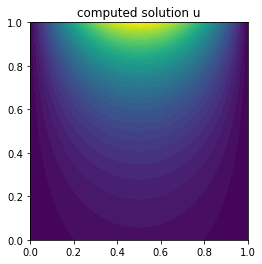

In [5]:
A, b = dl.assemble_system(a, L, bcs)
u = dl.Function(Vh, name="solution")
dl.solve(A, u.vector(), b)

dl.plot(u)
plt.title('computed solution u')

### 6. Compute error norms

In [6]:
u_exact = dl.Expression("exp(pi*x[1])*sin(pi*x[0])", degree = finite_element_order_p+2, domain=mesh)

grad_u_exact = dl.Expression( ("pi*exp(pi*x[1])*cos(pi*x[0])",
                               "pi*exp(pi*x[1])*sin(pi*x[0])"), degree = finite_element_order_p+2, domain=mesh )

norm_u_exact   = math.sqrt(dl.assemble(u_exact**2*dl.dx))
norm_grad_exact = math.sqrt(dl.assemble(dl.inner(grad_u_exact, grad_u_exact)*dl.dx))

err_L2   = math.sqrt(dl.assemble((u - u_exact)**2*dl.dx))
err_grad = math.sqrt(dl.assemble(dl.inner(dl.grad(u) - grad_u_exact, dl.grad(u) - grad_u_exact)*dl.dx))

print ("|| u_exact - u_h ||_L2 / || u_exact ||_L2 = ", err_L2/norm_u_exact)
print ("|| grad(u_exact - u_h)||_L2 / = || grad(u_exact)||_L2 ", err_grad/norm_grad_exact)

|| u_exact - u_h ||_L2 / || u_exact ||_L2 =  0.001705495117570913
|| grad(u_exact - u_h)||_L2 / = || grad(u_exact)||_L2  0.04903424613645494
